<a href="https://colab.research.google.com/github/DetlefShrimps/goodeye/blob/main/goodeye_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

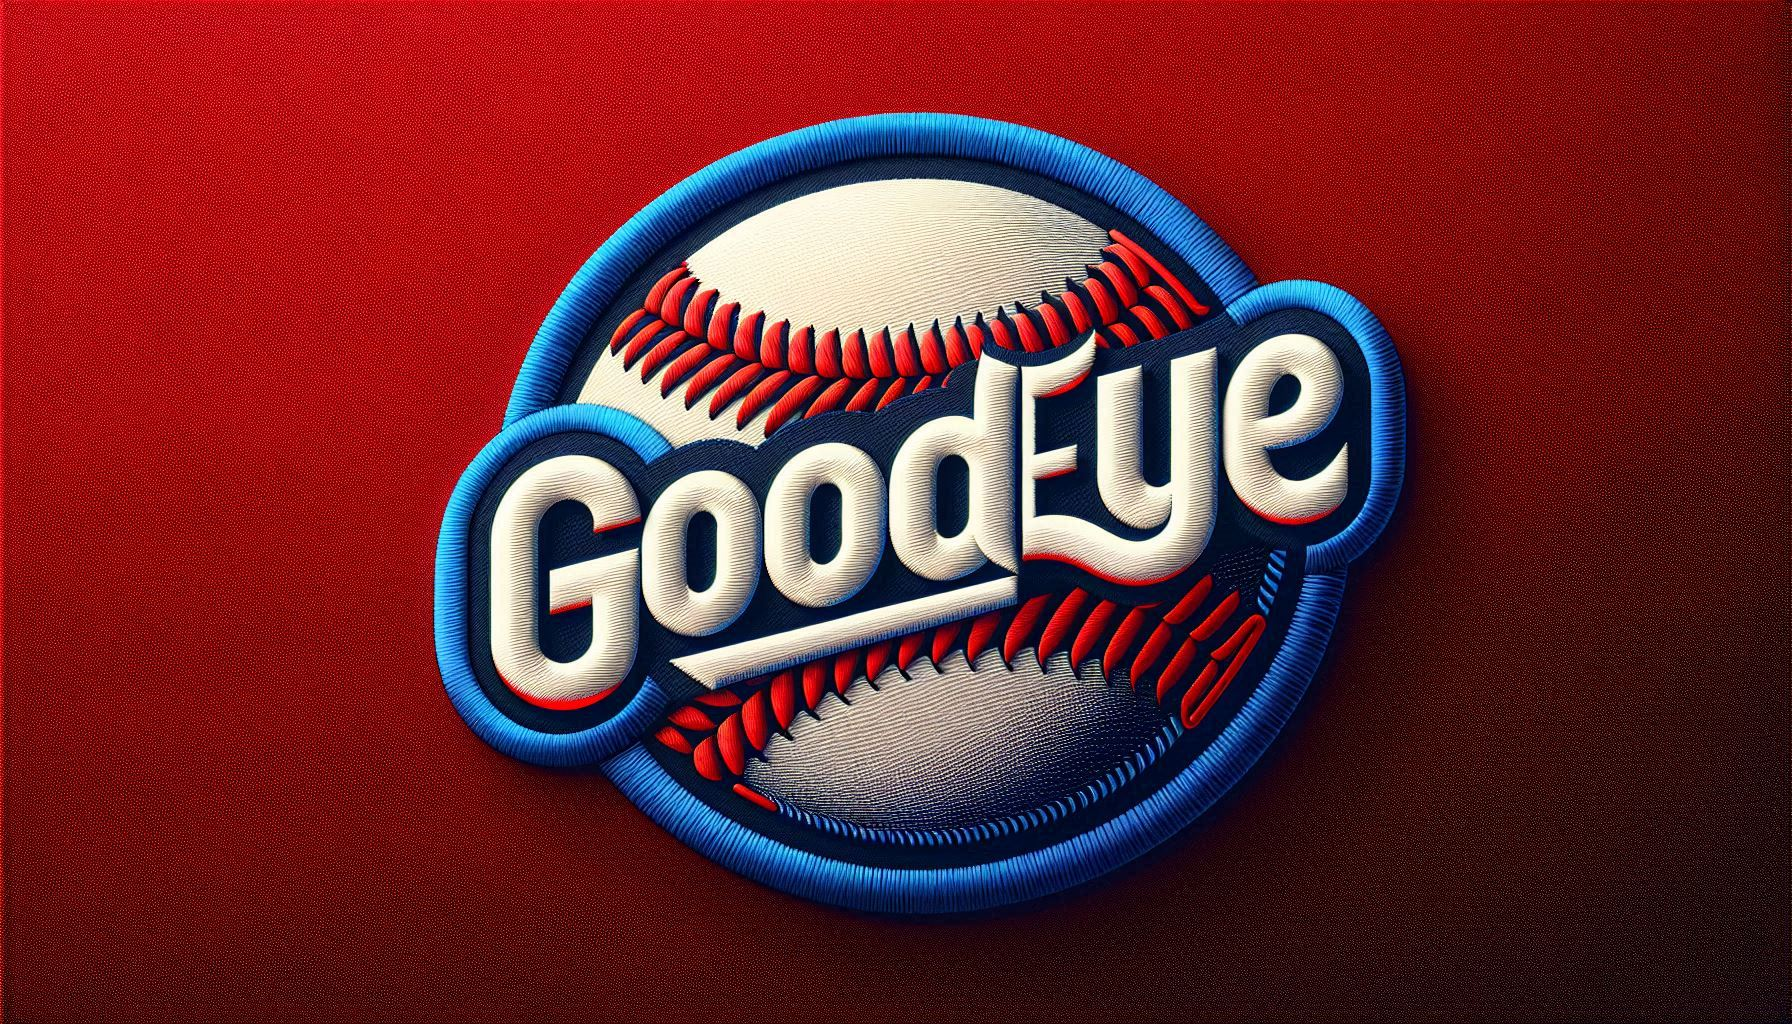

# The g00d3y3 project is an advanced machine learning initiative aimed at autonomously predicting and profiting from MLB betting lines.




In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
import requests
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
def read_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  df = pd.read_csv(csv)
  return df

In [ ]:
pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 31.9 MB/s eta 0:00:00


In [ ]:
from pybaseball import  batting_stats_range, pitching_stats_range,schedule_and_record
from pybaseball import cache
from datetime import datetime, timedelta


In [ ]:
cache.enable()


In [ ]:

from datetime import datetime
from dateutil.relativedelta import relativedelta

# Get the current date and time
current_datetime = datetime.now()

# Format it as a string in "YYYY-MM-DD" format
formatted_date = current_datetime.strftime("%Y-%m-%d")

print(formatted_date)

2024-08-04


In [ ]:
tms = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'HOU', 'KCR', 'ANA', 'MIN',
       'NYY', 'OAK', 'SEA', 'TBD', 'TEX', 'TOR', 'ARI', 'ATL', 'CHC',
       'CIN', 'COL', 'LAD', 'FLA', 'MIL', 'NYM', 'PHI', 'PIT', 'SDP',
       'SFG', 'STL', 'WSN']

In [ ]:
Month = {'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Mar':3,'Feb':2,'Jan':1,'Nov':11,'Dec':12}
Home_Away = {'Home':1,'@':0}
Tm = {'BAL':0, 'BOS':1, 'CHW':2, 'CLE':3, 'DET':4, 'HOU':5, 'KCR':6, 'ANA':7, 'MIN':8,
       'NYY':9, 'OAK':10, 'SEA':11, 'TBD':-1, 'TEX':12, 'TOR':13, 'ARI':14, 'ATL':15, 'CHC':16,
       'CIN':17, 'COL':18, 'LAD':19, 'FLA':20, 'MIL':21, 'NYM':22, 'PHI':23, 'PIT':24, 'SDP':25,
       'SFG':26, 'STL':27, 'WSN':28,'MON':29,'LAA':30,'TBR':31,'MIA':32}
W_L = {'L':-5, 'W':5, 'W-wo':1, 'L-wo':-1, 'T':0, 'W &H':2, 'L &V':-3, 'W &V':3, 'L &H':-2,
       'W &X':4, 'L &X':-4, 'nan':-9}
W_L_1 = {'L':0, 'W':1, 'T':-9, ' ':-9}
W_L_2 = {'L':0, 'W':3, 'o':2, 'T':1, 'H':4, ' ':-9, 'V':5, 'X':6}
D_N = {'D':1,"N":0,"nan":-9}
Weekday = {'Monday,':1, 'Wednesday,':3, 'Thursday,':4, 'Friday,':5, 'Saturday,':6,'Sunday,':7, 'Tuesday,':2}


In [ ]:
def preprocess(df):
    # starting preprocessing
    df["Day"]=df["Date"].astype(str).str[-2:]
    try:
        df[["Weekday","Month","Day","None"]]=df["Date"].astype(str).str.split(" ",expand=True)
    except:
        df[["Weekday","Month","Day"]]=df["Date"].astype(str).str.split(" ",expand=True)
    df["W/L_1"]=df["W/L"].fillna(" ").astype(str).str[0]
    df["W/L_2"]=df["W/L"].fillna(" ").astype(str).str[-1]
    df["Month"]=df["Month"].replace(Month)
    df["Home_Away"]=df["Home_Away"].replace(Home_Away)
    df["W/L"]=df["W/L"].replace(W_L)
    df["W/L_1"]=df["W/L_1"].replace(W_L_1)
    df["W/L_2"]=df["W/L_2"].replace(W_L_2)
    df["D/N"]=df["D/N"].replace(D_N)
    df["Weekday"]=df["Weekday"].replace(Weekday)
    df[["W","L"]] = df["W-L"].astype(str).str.split("-",expand=True)
    df["RD"] = df["R"] - df["RA"]
    df["RT"] = df["R"] + df["RA"]
    df["tm"]=df["Tm"].replace(Tm)
    df["opp"]=df["Opp"].replace(Tm)
    return df

In [ ]:
df = read_csv("https://drive.google.com/file/d/1IhA01ALLzD7GnYw7fHRUUh5eVQyfD-F3/view?usp=sharing")
standings = read_csv("https://drive.google.com/file/d/1sqqtNURYqIaXDOuCKQLIv1U0g0SQrLDV/view?usp=sharincg")
batting_df = read_csv("https://drive.google.com/file/d/19jkumjfuPlwuso-d284pUevLgS0LFYlN/view?usp=sharing")
pitching_df = read_csv("https://drive.google.com/file/d/12U0-pSHzReiRxvEPWLNh2Q2J4suSffGE/view?usp=sharing")
df

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,yr
0,"Monday, Apr 3",BAL,Home,CLE,L,1.0,4.0,9.0,0-1,5.0,...,Colon,Mussina,Karsay,3:07,D,46902.0,.98,-1.0,NaN,2000
1,"Wednesday, Apr 5",BAL,Home,CLE,W,11.0,7.0,9.0,1-1,3.0,...,Ryan,Kamieniecki,NaN,3:17,N,33833.0,.96,1.0,NaN,2000
2,"Thursday, Apr 6",BAL,Home,CLE,W,6.0,2.0,9.0,2-1,1.0,...,Rapp,Nagy,Groom,2:36,N,35181.0,1.00,2.0,NaN,2000
3,"Friday, Apr 7",BAL,Home,DET,W,14.0,10.0,9.0,3-1,1.0,...,Worrell,Mlicki,NaN,3:33,N,39415.0,1.04,3.0,NaN,2000
4,"Saturday, Apr 8",BAL,Home,DET,W-wo,2.0,1.0,10.0,4-1,1.0,...,Reyes,Brocail,NaN,3:06,D,42547.0,1.08,4.0,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109659,"Tuesday, Sep 26",WSN,@,BAL,L,0.0,1.0,9.0,69-89,5.0,...,Bradish,Gray,Cano,2:21,N,20823.0,.00,-2.0,NaN,2023
109660,"Wednesday, Sep 27",WSN,@,BAL,L,1.0,5.0,9.0,69-90,5.0,...,Rodriguez,Corbin,NaN,2:28,N,24278.0,.00,-3.0,NaN,2023
109661,"Friday, Sep 29",WSN,@,ATL,W,10.0,6.0,9.0,70-90,5.0,...,Weems,Hand,NaN,3:16,N,41481.0,.00,1.0,NaN,2023
109662,"Saturday, Sep 30",WSN,@,ATL,L,3.0,5.0,9.0,70-91,5.0,...,Strider,Weems,Iglesias,3:00,N,41652.0,.00,-1.0,NaN,2023


In [ ]:
pitching_df

,Name,Age,#days,Lev,Date,Tm,Â,Opp,G,GS,...,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID,start_dt
0,Austin Adams,33,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,0.67,NaN,NaN,NaN,0.000,NaN,27.0,NaN,613534,2024-07-30
1,Joan Adon,25,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,0,...,0.00,0.20,0.00,0.20,0.750,0.000,0.0,NaN,672851,2024-07-30
2,Jorge Alcal\xc3\xa1,28,0,Maj-AL,"Jul 30, 2024",Minnesota,@,New York,1,0,...,0.13,0.50,0.50,0.00,1.000,0.500,18.0,NaN,660896,2024-07-30
3,Scott Alexander,34,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,0.13,0.50,0.50,0.00,3.000,0.500,13.5,1.0,518397,2024-07-30
4,Tyler Alexander,29,0,Maj-AL,"Jul 30, 2024",Tampa Bay,NaN,Miami,1,0,...,0.07,0.40,0.20,0.00,0.429,0.000,11.6,NaN,641302,2024-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005,Tyler Wells,27,753,Maj-AL,"Jul 8, 2022",Baltimore,NaN,Los Angeles,1,1,...,0.11,0.43,0.21,0.14,2.000,0.385,6.8,1.5,669330,2022-07-08
15006,Zack Wheeler,32,753,Maj-NL,"Jul 8, 2022",Philadelphia,@,St. Louis,1,1,...,0.09,0.48,0.24,0.14,0.857,0.238,6.4,5.0,554430,2022-07-08
15007,Rowan Wick,29,753,Maj-NL,"Jul 8, 2022",Chicago,@,Los Angeles,1,0,...,0.17,0.00,1.00,0.00,NaN,1.000,NaN,0.0,592858,2022-07-08
15008,Devin Williams,27,753,Maj-NL,"Jul 8, 2022",Milwaukee,NaN,Pittsburgh,1,0,...,0.14,0.33,0.33,0.33,2.000,0.333,9.0,1.0,642207,2022-07-08


In [ ]:
batting_df

,Name,Age,#days,Lev,Date,Tm,Â,Opp,G,PA,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID,start_dt
0,CJ Abrams,23,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,3,...,0,0,0,0,0.333,0.333,0.333,0.667,682928,2024-07-30
1,Wilyer Abreu,25,0,Maj-AL,"Jul 30, 2024",Boston,NaN,Seattle,1,3,...,0,0,0,0,0.500,0.667,1.000,1.667,677800,2024-07-30
2,Willy Adames,28,0,Maj-NL,"Jul 30, 2024",Milwaukee,NaN,Atlanta,1,4,...,0,0,0,0,0.333,0.500,0.667,1.167,642715,2024-07-30
3,Riley Adams,28,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,1,...,0,0,0,0,0.000,0.000,0.000,0.000,656180,2024-07-30
4,Jo Adell,25,0,Maj-AL,"Jul 30, 2024",Los Angeles,NaN,Colorado,1,5,...,0,0,0,0,0.333,0.600,1.333,1.933,666176,2024-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84064,Kolten Wong,32,488,Maj-AL,"Mar 30, 2023",Seattle,NaN,Cleveland,1,4,...,0,0,0,0,0.000,0.250,0.000,0.250,543939,2023-03-30
84065,Mike Yastrzemski,32,488,Maj-NL,"Mar 30, 2023",San Francisco,@,New York,1,2,...,0,0,0,0,0.000,0.000,0.000,0.000,573262,2023-03-30
84066,Christian Yelich,31,488,Maj-NL,"Mar 30, 2023",Milwaukee,@,Chicago,1,4,...,0,0,0,0,0.000,0.500,0.000,0.500,592885,2023-03-30
84067,Masataka Yoshida,29,488,Maj-AL,"Mar 30, 2023",Boston,NaN,Baltimore,1,5,...,0,0,0,0,0.500,0.600,0.500,1.100,807799,2023-03-30


In [ ]:
batting_df.start_dt.nunique(), pitching_df.start_dt.nunique()

(328, 135)

In [ ]:
m=batting_df.start_dt.max()
for i in range(200):
    yesterday = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')
    if m == yesterday:
      print("break")
      break
    try:
        p=batting_stats_range(start_dt=yesterday, end_dt=yesterday)
        p["start_dt"] = yesterday
        batting_df = pd.concat([batting_df, p], axis = 0)
    except:
        continue

break


In [ ]:
m=pitching_df.start_dt.max()
for i in range(200):
    yesterday = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')
    if m == yesterday:
      print("break")
      break
    try:
        p=pitching_stats_range(start_dt=yesterday, end_dt=yesterday)
        p["start_dt"] = yesterday
        pitching_df = pd.concat([pitching_df, p], axis = 0)
    except:
        continue

break


In [ ]:
pitching_df

,Name,Age,#days,Lev,Date,Tm,Â,Opp,G,GS,...,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID,start_dt,
0,Austin Adams,33,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,NaN,NaN,NaN,0.000,NaN,27.0,NaN,613534,2024-07-30,NaN
1,Joan Adon,25,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,0,...,0.20,0.00,0.20,0.750,0.000,0.0,NaN,672851,2024-07-30,NaN
2,Jorge Alcal\xc3\xa1,28,0,Maj-AL,"Jul 30, 2024",Minnesota,@,New York,1,0,...,0.50,0.50,0.00,1.000,0.500,18.0,NaN,660896,2024-07-30,NaN
3,Scott Alexander,34,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,0.50,0.50,0.00,3.000,0.500,13.5,1.0,518397,2024-07-30,NaN
4,Tyler Alexander,29,0,Maj-AL,"Jul 30, 2024",Tampa Bay,NaN,Miami,1,0,...,0.40,0.20,0.00,0.429,0.000,11.6,NaN,641302,2024-07-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Logan Webb,27,3,Maj-NL,"Jul 31, 2024",San Francisco,NaN,Oakland,1,1,...,0.63,0.11,0.04,0.667,0.185,6.0,6.0,657277,2024-07-31,
120,Josh Winckowski,26,3,Maj-AL,"Jul 31, 2024",Boston,NaN,Seattle,1,0,...,0.50,0.00,0.00,0.000,0.000,9.0,NaN,670174,2024-07-31,
121,Jake Woodford,27,3,Maj-NL,"Jul 31, 2024",Pittsburgh,NaN,Houston,1,1,...,0.50,0.13,0.06,0.400,0.125,5.4,NaN,663765,2024-07-31,@
122,Danny Young,30,3,Maj-NL,"Jul 31, 2024",New York,NaN,Minnesota,1,0,...,0.50,0.50,0.00,0.000,0.000,9.0,NaN,664849,2024-07-31,


In [ ]:
batting_df

,Name,Age,#days,Lev,Date,Tm,Â,Opp,G,PA,...,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID,start_dt,
0,CJ Abrams,23,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,3,...,0,0,0,0.333,0.333,0.333,0.667,682928,2024-07-30,NaN
1,Wilyer Abreu,25,0,Maj-AL,"Jul 30, 2024",Boston,NaN,Seattle,1,3,...,0,0,0,0.500,0.667,1.000,1.667,677800,2024-07-30,NaN
2,Willy Adames,28,0,Maj-NL,"Jul 30, 2024",Milwaukee,NaN,Atlanta,1,4,...,0,0,0,0.333,0.500,0.667,1.167,642715,2024-07-30,NaN
3,Riley Adams,28,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,1,...,0,0,0,0.000,0.000,0.000,0.000,656180,2024-07-30,NaN
4,Jo Adell,25,0,Maj-AL,"Jul 30, 2024",Los Angeles,NaN,Colorado,1,5,...,0,0,0,0.333,0.600,1.333,1.933,666176,2024-07-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Eric Yang,26,3,Maj-NL,"Jul 31, 2024",Cincinnati,NaN,Chicago,1,1,...,0,0,0,0.000,0.000,0.000,0.000,687066,2024-07-31,
317,Mike Yastrzemski,33,3,Maj-NL,"Jul 31, 2024",San Francisco,NaN,Oakland,1,3,...,0,0,0,0.333,0.333,0.333,0.667,573262,2024-07-31,
318,Juan Yepez,26,3,Maj-NL,"Jul 31, 2024",Washington,NaN,Arizona,1,5,...,0,0,0,0.250,0.400,0.500,0.900,660766,2024-07-31,@
319,Masataka Yoshida,30,3,Maj-AL,"Jul 31, 2024",Boston,NaN,Seattle,1,3,...,0,0,0,0.000,0.333,0.000,0.333,807799,2024-07-31,


In [ ]:
df

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,yr
0,"Monday, Apr 3",BAL,Home,CLE,L,1.0,4.0,9.0,0-1,5.0,...,Colon,Mussina,Karsay,3:07,D,46902.0,.98,-1.0,NaN,2000
1,"Wednesday, Apr 5",BAL,Home,CLE,W,11.0,7.0,9.0,1-1,3.0,...,Ryan,Kamieniecki,NaN,3:17,N,33833.0,.96,1.0,NaN,2000
2,"Thursday, Apr 6",BAL,Home,CLE,W,6.0,2.0,9.0,2-1,1.0,...,Rapp,Nagy,Groom,2:36,N,35181.0,1.00,2.0,NaN,2000
3,"Friday, Apr 7",BAL,Home,DET,W,14.0,10.0,9.0,3-1,1.0,...,Worrell,Mlicki,NaN,3:33,N,39415.0,1.04,3.0,NaN,2000
4,"Saturday, Apr 8",BAL,Home,DET,W-wo,2.0,1.0,10.0,4-1,1.0,...,Reyes,Brocail,NaN,3:06,D,42547.0,1.08,4.0,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109659,"Tuesday, Sep 26",WSN,@,BAL,L,0.0,1.0,9.0,69-89,5.0,...,Bradish,Gray,Cano,2:21,N,20823.0,.00,-2.0,NaN,2023
109660,"Wednesday, Sep 27",WSN,@,BAL,L,1.0,5.0,9.0,69-90,5.0,...,Rodriguez,Corbin,NaN,2:28,N,24278.0,.00,-3.0,NaN,2023
109661,"Friday, Sep 29",WSN,@,ATL,W,10.0,6.0,9.0,70-90,5.0,...,Weems,Hand,NaN,3:16,N,41481.0,.00,1.0,NaN,2023
109662,"Saturday, Sep 30",WSN,@,ATL,L,3.0,5.0,9.0,70-91,5.0,...,Strider,Weems,Iglesias,3:00,N,41652.0,.00,-1.0,NaN,2023


In [ ]:
yr = int(formatted_date[:4])
mt = int(formatted_date[5:7])
dy = int(formatted_date[8:10])

for tm in tms:
    try:
      x=schedule_and_record(yr,tm)
      x["yr"] = yr
      df=pd.concat([df,x],axis=0)
    except:
      continue

http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/BOS/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/CHW/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/CLE/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/HOU/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/KCR/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/ANA/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/MIN/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/NYY/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/SEA/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/TBD/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/TEX/2024-schedule-scores.shtml
http:/

In [ ]:
yr

2024

In [ ]:
df=df[df.Home_Away=="Home"]
df

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,yr
0,"Monday, Apr 3",BAL,Home,CLE,L,1.0,4.0,9.0,0-1,5.0,...,Colon,Mussina,Karsay,3:07,D,46902.0,.98,-1.0,NaN,2000
1,"Wednesday, Apr 5",BAL,Home,CLE,W,11.0,7.0,9.0,1-1,3.0,...,Ryan,Kamieniecki,NaN,3:17,N,33833.0,.96,1.0,NaN,2000
2,"Thursday, Apr 6",BAL,Home,CLE,W,6.0,2.0,9.0,2-1,1.0,...,Rapp,Nagy,Groom,2:36,N,35181.0,1.00,2.0,NaN,2000
3,"Friday, Apr 7",BAL,Home,DET,W,14.0,10.0,9.0,3-1,1.0,...,Worrell,Mlicki,NaN,3:33,N,39415.0,1.04,3.0,NaN,2000
4,"Saturday, Apr 8",BAL,Home,DET,W-wo,2.0,1.0,10.0,4-1,1.0,...,Reyes,Brocail,NaN,3:06,D,42547.0,1.08,4.0,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,"Wednesday, Sep 25",WSN,Home,KCR,None,NaN,NaN,NaN,None,NaN,...,None,None,None,None,None,NaN,None,NaN,None,2024
159,"Thursday, Sep 26",WSN,Home,KCR,None,NaN,NaN,NaN,None,NaN,...,None,None,None,None,None,NaN,None,NaN,None,2024
160,"Friday, Sep 27",WSN,Home,PHI,None,NaN,NaN,NaN,None,NaN,...,None,None,None,None,None,NaN,None,NaN,None,2024
161,"Saturday, Sep 28",WSN,Home,PHI,None,NaN,NaN,NaN,None,NaN,...,None,None,None,None,None,NaN,None,NaN,None,2024


In [ ]:

df=preprocess(df)
df

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Month,None,W/L_1,W/L_2,W,L,RD,RT,tm,opp
0,"Monday, Apr 3",BAL,1,CLE,-5.0,1.0,4.0,9.0,0-1,5.0,...,4,None,0,0,0,1,-3.0,5.0,0,3
1,"Wednesday, Apr 5",BAL,1,CLE,5.0,11.0,7.0,9.0,1-1,3.0,...,4,None,1,3,1,1,4.0,18.0,0,3
2,"Thursday, Apr 6",BAL,1,CLE,5.0,6.0,2.0,9.0,2-1,1.0,...,4,None,1,3,2,1,4.0,8.0,0,3
3,"Friday, Apr 7",BAL,1,DET,5.0,14.0,10.0,9.0,3-1,1.0,...,4,None,1,3,3,1,4.0,24.0,0,4
4,"Saturday, Apr 8",BAL,1,DET,1.0,2.0,1.0,10.0,4-1,1.0,...,4,None,1,2,4,1,1.0,3.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,"Wednesday, Sep 25",WSN,1,KCR,NaN,NaN,NaN,NaN,None,NaN,...,9,None,-9,-9,None,None,NaN,NaN,28,6
159,"Thursday, Sep 26",WSN,1,KCR,NaN,NaN,NaN,NaN,None,NaN,...,9,None,-9,-9,None,None,NaN,NaN,28,6
160,"Friday, Sep 27",WSN,1,PHI,NaN,NaN,NaN,NaN,None,NaN,...,9,None,-9,-9,None,None,NaN,NaN,28,23
161,"Saturday, Sep 28",WSN,1,PHI,NaN,NaN,NaN,NaN,None,NaN,...,9,None,-9,-9,None,None,NaN,NaN,28,23


In [ ]:
standings

,Tm,W,L,W-L%,GB,yr,conf
0,New York Yankees,87,74,0.540,--,2000,0
1,Boston Red Sox,85,77,0.525,2.5,2000,0
2,Toronto Blue Jays,83,79,0.512,4.5,2000,0
3,Baltimore Orioles,74,88,0.457,13.5,2000,0
4,Tampa Bay Devil Rays,69,92,0.429,18.0,2000,0
...,...,...,...,...,...,...,...
715,Los Angeles Dodgers,100,62,0.617,--,2023,5
716,Arizona Diamondbacks,84,78,0.519,16.0,2023,5
717,San Diego Padres,82,80,0.506,18.0,2023,5
718,San Francisco Giants,79,83,0.488,21.0,2023,5


In [ ]:
standings.yr.nunique()

24

In [ ]:
standings.yr.value_counts()

,count
yr,
2000,30
2001,30
2022,30
2021,30
2020,30
2019,30
2018,30
2017,30
2016,30


In [ ]:

df["Date"]=df["Date"].astype(str).str.split("(",expand=True)[0]
df["Date"]=pd.to_datetime(df.Date+", "+df["yr"].astype(str),format='mixed')



In [ ]:
ed = standings.copy()
ed.Tm.unique()

array(['New York Yankees', 'Boston Red Sox', 'Toronto Blue Jays',
       'Baltimore Orioles', 'Tampa Bay Devil Rays', 'Chicago White Sox',
       'Cleveland Indians', 'Detroit Tigers', 'Kansas City Royals',
       'Minnesota Twins', 'Oakland Athletics', 'Seattle Mariners',
       'Anaheim Angels', 'Texas Rangers', 'Atlanta Braves',
       'New York Mets', 'Florida Marlins', 'Montreal Expos',
       'Philadelphia Phillies', 'St. Louis Cardinals', 'Cincinnati Reds',
       'Milwaukee Brewers', 'Houston Astros', 'Pittsburgh Pirates',
       'Chicago Cubs', 'San Francisco Giants', 'Los Angeles Dodgers',
       'Arizona Diamondbacks', 'Colorado Rockies', 'San Diego Padres',
       'Los Angeles Angels of Anaheim', 'Washington Nationals',
       'Tampa Bay Rays', 'Miami Marlins', 'Los Angeles Angels',
       'Cleveland Guardians'], dtype=object)

In [ ]:
mlb_teams = {
    'BAL': 'Baltimore Orioles',
    'BOS': 'Boston Red Sox',
    'CHW': 'Chicago White Sox',
    'CLE': 'Cleveland Guardians',
    'DET': 'Detroit Tigers',
    'HOU': 'Houston Astros',
    'KCR': 'Kansas City Royals',
    'ANA': 'Los Angeles Angels',
    'MIN': 'Minnesota Twins',
    'NYY': 'New York Yankees',
    'OAK': 'Oakland Athletics',
    'SEA': 'Seattle Mariners',
    'TBD': 'Tampa Bay Rays',
    'TEX': 'Texas Rangers',
    'TOR': 'Toronto Blue Jays',
    'ARI': 'Arizona Diamondbacks',
    'ATL': 'Atlanta Braves',
    'CHC': 'Chicago Cubs',
    'CIN': 'Cincinnati Reds',
    'COL': 'Colorado Rockies',
    'LAD': 'Los Angeles Dodgers',
    'FLA': 'Miami Marlins',
    'MIL': 'Milwaukee Brewers',
    'NYM': 'New York Mets',
    'PHI': 'Philadelphia Phillies',
    'PIT': 'Pittsburgh Pirates',
    'SDP': 'San Diego Padres',
    'SFG': 'San Francisco Giants',
    'STL': 'St. Louis Cardinals',
    'WSN': 'Washington Nationals',
    'LAA': 'Los Angeles Angels',
'TBR': 'Tampa Bay Rays',
'MIA': 'Miami Marlins',
'MON': 'Washington Nationals'
}


In [ ]:
df=df[["Date","Tm","Opp","Home_Away","yr","R","RA"]]

In [ ]:
df["Tm"] = df["Tm"].replace(mlb_teams)
df["Opp"] = df["Opp"].replace(mlb_teams)

In [ ]:
ed.Tm = ed.Tm.replace({"Tampa Bay Devil Rays":'Tampa Bay Rays',
                 'Cleveland Indians':'Cleveland Guardians',
                 'Montreal Expos':"Washington Nationals",
                 "Los Angeles Angels of Anaheim":"Los Angeles Angels",
                 "Anaheim Angels":"Los Angeles Angels",
                 "Florida Marlins":"Miami Marlins"
                 })

In [ ]:
df[~df.Tm.isin(ed.Tm)]["Tm"].unique()

array([], dtype=object)

In [ ]:
df=df.drop_duplicates(["Tm","Opp","Date"])
df

,Date,Tm,Opp,Home_Away,yr,R,RA
0,2000-04-03,Baltimore Orioles,Cleveland Guardians,1,2000,1.0,4.0
1,2000-04-05,Baltimore Orioles,Cleveland Guardians,1,2000,11.0,7.0
2,2000-04-06,Baltimore Orioles,Cleveland Guardians,1,2000,6.0,2.0
3,2000-04-07,Baltimore Orioles,Detroit Tigers,1,2000,14.0,10.0
4,2000-04-08,Baltimore Orioles,Detroit Tigers,1,2000,2.0,1.0
...,...,...,...,...,...,...,...
158,2024-09-25,Washington Nationals,Kansas City Royals,1,2024,NaN,NaN
159,2024-09-26,Washington Nationals,Kansas City Royals,1,2024,NaN,NaN
160,2024-09-27,Washington Nationals,Philadelphia Phillies,1,2024,NaN,NaN
161,2024-09-28,Washington Nationals,Philadelphia Phillies,1,2024,NaN,NaN


In [ ]:
df = df.sort_values(["Tm","Opp","Date"])
for col in ["R","RA"]:
  df[col+"_sum"]=df.groupby(["Tm","yr"])[col].rolling(50,min_periods=1).sum().shift(1).values

  df[col+"_sum"]=df[col+"_sum"].fillna(0)


for col in ["R","RA"]:
  df[col+"_sum2"]=df.groupby(["Opp","yr"])[col].rolling(50,min_periods=1).sum().shift(1).values

  df[col+"_sum2"]=df[col+"_sum2"].fillna(0)

df

,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,RA_sum2
51415,2000-08-01,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,4.0,0.0,0.0,0.0,0.0
51416,2000-08-02,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,0.0,2.0,4.0,5.0,2.0
51417,2000-08-03,Arizona Diamondbacks,Atlanta Braves,1,2000,8.0,4.0,4.0,4.0,12.0,3.0
51454,2000-09-15,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,1.0,12.0,8.0,16.0,3.0
51455,2000-09-16,Arizona Diamondbacks,Atlanta Braves,1,2000,10.0,12.0,14.0,9.0,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
105063,2021-08-17,Washington Nationals,Toronto Blue Jays,1,2021,12.0,6.0,125.0,163.0,185.0,155.0
105064,2021-08-18,Washington Nationals,Toronto Blue Jays,1,2021,8.0,5.0,128.0,171.0,188.0,169.0
32,2024-05-03,Washington Nationals,Toronto Blue Jays,1,2024,9.0,3.0,128.0,177.0,192.0,172.0
33,2024-05-04,Washington Nationals,Toronto Blue Jays,1,2024,3.0,6.0,137.0,180.0,199.0,173.0


In [ ]:
ed.yr=ed.yr+1
ed

,Tm,W,L,W-L%,GB,yr,conf
0,New York Yankees,87,74,0.540,--,2001,0
1,Boston Red Sox,85,77,0.525,2.5,2001,0
2,Toronto Blue Jays,83,79,0.512,4.5,2001,0
3,Baltimore Orioles,74,88,0.457,13.5,2001,0
4,Tampa Bay Rays,69,92,0.429,18.0,2001,0
...,...,...,...,...,...,...,...
715,Los Angeles Dodgers,100,62,0.617,--,2024,5
716,Arizona Diamondbacks,84,78,0.519,16.0,2024,5
717,San Diego Padres,82,80,0.506,18.0,2024,5
718,San Francisco Giants,79,83,0.488,21.0,2024,5


In [ ]:
df=pd.merge(pd.merge(df,ed,how="left"),ed.rename({"Tm":"Opp"},axis=1),on=["Opp","yr"],how="left")
df

,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,...,W_x,L_x,W-L%_x,GB_x,conf_x,W_y,L_y,W-L%_y,GB_y,conf_y
0,2000-08-01,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-02,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,0.0,2.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-03,Arizona Diamondbacks,Atlanta Braves,1,2000,8.0,4.0,4.0,4.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-09-15,Arizona Diamondbacks,Atlanta Braves,1,2000,2.0,1.0,12.0,8.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-16,Arizona Diamondbacks,Atlanta Braves,1,2000,10.0,12.0,14.0,9.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54195,2021-08-17,Washington Nationals,Toronto Blue Jays,1,2021,12.0,6.0,125.0,163.0,185.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54196,2021-08-18,Washington Nationals,Toronto Blue Jays,1,2021,8.0,5.0,128.0,171.0,188.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54197,2024-05-03,Washington Nationals,Toronto Blue Jays,1,2024,9.0,3.0,128.0,177.0,192.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0
54198,2024-05-04,Washington Nationals,Toronto Blue Jays,1,2024,3.0,6.0,137.0,180.0,199.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0


In [ ]:
cols=['W_x', 'L_x', 'W-L%_x', 'conf_x', 'W_y', 'L_y',
       'W-L%_y', 'conf_y'] +["R_sum","RA_sum"] +["R_sum2","RA_sum2"]


for col in cols:
  df=df[df[col].notna()]
df

,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,...,W_x,L_x,W-L%_x,GB_x,conf_x,W_y,L_y,W-L%_y,GB_y,conf_y
6,2001-04-26,Arizona Diamondbacks,Atlanta Braves,1,2001,13.0,6.0,25.0,28.0,26.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
7,2001-04-27,Arizona Diamondbacks,Atlanta Braves,1,2001,0.0,9.0,36.0,30.0,30.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
8,2001-04-28,Arizona Diamondbacks,Atlanta Braves,1,2001,1.0,3.0,47.0,33.0,34.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
9,2001-04-29,Arizona Diamondbacks,Atlanta Braves,1,2001,7.0,5.0,52.0,37.0,43.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
10,2002-08-06,Arizona Diamondbacks,Atlanta Braves,1,2002,3.0,4.0,56.0,42.0,47.0,...,92.0,70.0,0.568,--,5.0,88.0,74.0,0.543,--,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54195,2021-08-17,Washington Nationals,Toronto Blue Jays,1,2021,12.0,6.0,125.0,163.0,185.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54196,2021-08-18,Washington Nationals,Toronto Blue Jays,1,2021,8.0,5.0,128.0,171.0,188.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54197,2024-05-03,Washington Nationals,Toronto Blue Jays,1,2024,9.0,3.0,128.0,177.0,192.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0
54198,2024-05-04,Washington Nationals,Toronto Blue Jays,1,2024,3.0,6.0,137.0,180.0,199.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0


In [ ]:
# Mapping dictionary
team_mapping = {
    'Arizona Diamondbacks': 'Arizona', 'Atlanta Braves': 'Atlanta', 'Baltimore Orioles': 'Baltimore',
    'Boston Red Sox': 'Boston', 'Chicago Cubs': 'Chicago', 'Chicago White Sox': 'Chicago',
    'Cincinnati Reds': 'Cincinnati', 'Cleveland Guardians': 'Cleveland', 'Colorado Rockies': 'Colorado',
    'Detroit Tigers': 'Detroit', 'Houston Astros': 'Houston', 'Kansas City Royals': 'Kansas City',
    'Los Angeles Angels': 'Los Angeles', 'Los Angeles Dodgers': 'Los Angeles', 'Miami Marlins': 'Miami',
    'Milwaukee Brewers': 'Milwaukee', 'Minnesota Twins': 'Minnesota', 'New York Mets': 'New York',
    'New York Yankees': 'New York', 'Oakland Athletics': 'Oakland', 'Philadelphia Phillies': 'Philadelphia',
    'Pittsburgh Pirates': 'Pittsburgh', 'San Diego Padres': 'San Diego', 'San Francisco Giants': 'San Francisco',
    'Seattle Mariners': 'Seattle', 'St. Louis Cardinals': 'St. Louis', 'Tampa Bay Rays': 'Tampa Bay',
    'Texas Rangers': 'Texas', 'Toronto Blue Jays': 'Toronto', 'Washington Nationals': 'Washington'
}

# Rename the teams
df['Tm_city'] = df['Tm'].replace(team_mapping)
df['Opp_city'] = df['Opp'].replace(team_mapping)
df


,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,...,W-L%_x,GB_x,conf_x,W_y,L_y,W-L%_y,GB_y,conf_y,Tm_city,Opp_city
6,2001-04-26,Arizona,Atlanta,1,2001,13.0,6.0,25.0,28.0,26.0,...,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0,Arizona,Atlanta
7,2001-04-27,Arizona,Atlanta,1,2001,0.0,9.0,36.0,30.0,30.0,...,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0,Arizona,Atlanta
8,2001-04-28,Arizona,Atlanta,1,2001,1.0,3.0,47.0,33.0,34.0,...,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0,Arizona,Atlanta
9,2001-04-29,Arizona,Atlanta,1,2001,7.0,5.0,52.0,37.0,43.0,...,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0,Arizona,Atlanta
10,2002-08-06,Arizona,Atlanta,1,2002,3.0,4.0,56.0,42.0,47.0,...,0.568,--,5.0,88.0,74.0,0.543,--,3.0,Arizona,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54195,2021-08-17,Washington,Toronto,1,2021,12.0,6.0,125.0,163.0,185.0,...,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0,Washington,Toronto
54196,2021-08-18,Washington,Toronto,1,2021,8.0,5.0,128.0,171.0,188.0,...,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0,Washington,Toronto
54197,2024-05-03,Washington,Toronto,1,2024,9.0,3.0,128.0,177.0,192.0,...,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0,Washington,Toronto
54198,2024-05-04,Washington,Toronto,1,2024,3.0,6.0,137.0,180.0,199.0,...,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0,Washington,Toronto


In [ ]:
df2=df[df.R.isna()]
df2=df2[df2.RA.isna()]
df2 = df2[df2.Date>=datetime.today()]
df2 = df2.sort_values(["Date","Tm","Opp"])
df2


,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,...,W_x,L_x,W-L%_x,GB_x,conf_x,W_y,L_y,W-L%_y,GB_y,conf_y
8850,2024-08-05,Chicago,Minnesota,1,2024,NaN,NaN,170.0,204.0,18.0,...,83.0,79.0,0.512,9.0,4.0,87.0,75.0,0.537,--,1.0
13612,2024-08-05,Cleveland,Arizona,1,2024,NaN,NaN,58.0,54.0,283.0,...,76.0,86.0,0.469,11.0,1.0,84.0,78.0,0.519,16.0,5.0
21558,2024-08-05,Kansas City,Boston,1,2024,NaN,NaN,177.0,177.0,181.0,...,56.0,106.0,0.346,31.0,1.0,78.0,84.0,0.481,23.0,0.0
24948,2024-08-05,Los Angeles,Philadelphia,1,2024,NaN,NaN,89.0,61.0,144.0,...,100.0,62.0,0.617,--,5.0,90.0,72.0,0.556,14.0,3.0
34730,2024-08-05,Oakland,Chicago,1,2024,NaN,NaN,228.0,171.0,70.0,...,50.0,112.0,0.309,40.0,2.0,61.0,101.0,0.377,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,2024-09-29,New York,Pittsburgh,1,2024,NaN,NaN,238.0,229.0,150.0,...,82.0,80.0,0.506,19.0,0.0,76.0,86.0,0.469,16.0,4.0
44066,2024-09-29,San Francisco,St. Louis,1,2024,NaN,NaN,1.0,3.0,144.0,...,79.0,83.0,0.488,21.0,5.0,71.0,91.0,0.438,21.0,4.0
45624,2024-09-29,Seattle,Oakland,1,2024,NaN,NaN,218.0,239.0,212.0,...,88.0,74.0,0.543,2.0,2.0,50.0,112.0,0.309,40.0,2.0
51733,2024-09-29,Toronto,Miami,1,2024,NaN,NaN,242.0,226.0,108.0,...,89.0,73.0,0.549,12.0,0.0,84.0,78.0,0.519,20.0,3.0


In [ ]:
sorted(batting_df.Tm.unique())

['Arizona',
 'Atlanta',
 'Baltimore',
 'Boston',
 'Chicago',
 'Cincinnati',
 'Cleveland',
 'Colorado',
 'Detroit',
 'Houston',
 'Kansas City',
 'Los Angeles',
 'Miami',
 'Milwaukee',
 'Minnesota',
 'New York',
 'Oakland',
 'Philadelphia',
 'Pittsburgh',
 'San Diego',
 'San Francisco',
 'Seattle',
 'St. Louis',
 'Tampa Bay',
 'Texas',
 'Toronto',
 'Washington']

In [ ]:
sorted(df.Tm.unique())

['Arizona',
 'Atlanta',
 'Baltimore',
 'Boston',
 'Chicago',
 'Cincinnati',
 'Cleveland',
 'Colorado',
 'Detroit',
 'Houston',
 'Kansas City',
 'Los Angeles',
 'Miami',
 'Milwaukee',
 'Minnesota',
 'New York',
 'Oakland',
 'Philadelphia',
 'Pittsburgh',
 'San Diego',
 'San Francisco',
 'Seattle',
 'St. Louis',
 'Tampa Bay',
 'Texas',
 'Toronto',
 'Washington']

In [ ]:
batting_df = batting_df[batting_df.G==1]
batting_df

'2023-03-30'

In [ ]:
batting_df.start_dt.min(), batting_df.start_dt.max()

('2023-03-30', '2024-08-03')

In [ ]:
pitching_df = pitching_df[pitching_df.G==1]
pitching_df

,Name,Age,#days,Lev,Date,Tm,Â,Opp,G,GS,...,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID,start_dt,
0,Austin Adams,33,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,NaN,NaN,NaN,0.000,NaN,27.0,NaN,613534,2024-07-30,NaN
1,Joan Adon,25,0,Maj-NL,"Jul 30, 2024",Washington,@,Arizona,1,0,...,0.20,0.00,0.20,0.750,0.000,0.0,NaN,672851,2024-07-30,NaN
2,Jorge Alcal\xc3\xa1,28,0,Maj-AL,"Jul 30, 2024",Minnesota,@,New York,1,0,...,0.50,0.50,0.00,1.000,0.500,18.0,NaN,660896,2024-07-30,NaN
3,Scott Alexander,34,0,Maj-AL,"Jul 30, 2024",Oakland,@,San Francisco,1,0,...,0.50,0.50,0.00,3.000,0.500,13.5,1.0,518397,2024-07-30,NaN
4,Tyler Alexander,29,0,Maj-AL,"Jul 30, 2024",Tampa Bay,NaN,Miami,1,0,...,0.40,0.20,0.00,0.429,0.000,11.6,NaN,641302,2024-07-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Logan Webb,27,3,Maj-NL,"Jul 31, 2024",San Francisco,NaN,Oakland,1,1,...,0.63,0.11,0.04,0.667,0.185,6.0,6.0,657277,2024-07-31,
120,Josh Winckowski,26,3,Maj-AL,"Jul 31, 2024",Boston,NaN,Seattle,1,0,...,0.50,0.00,0.00,0.000,0.000,9.0,NaN,670174,2024-07-31,
121,Jake Woodford,27,3,Maj-NL,"Jul 31, 2024",Pittsburgh,NaN,Houston,1,1,...,0.50,0.13,0.06,0.400,0.125,5.4,NaN,663765,2024-07-31,@
122,Danny Young,30,3,Maj-NL,"Jul 31, 2024",New York,NaN,Minnesota,1,0,...,0.50,0.50,0.00,0.000,0.000,9.0,NaN,664849,2024-07-31,


In [ ]:
pitching_df.start_dt.min(), pitching_df.start_dt.max()

('2022-07-08', '2024-08-03')

In [ ]:
df1=df[df.R.notna()]
df1=df1[df1.RA.notna()]
df1

,Date,Tm,Opp,Home_Away,yr,R,RA,R_sum,RA_sum,R_sum2,...,W_x,L_x,W-L%_x,GB_x,conf_x,W_y,L_y,W-L%_y,GB_y,conf_y
6,2001-04-26,Arizona,Atlanta,1,2001,13.0,6.0,25.0,28.0,26.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
7,2001-04-27,Arizona,Atlanta,1,2001,0.0,9.0,36.0,30.0,30.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
8,2001-04-28,Arizona,Atlanta,1,2001,1.0,3.0,47.0,33.0,34.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
9,2001-04-29,Arizona,Atlanta,1,2001,7.0,5.0,52.0,37.0,43.0,...,85.0,77.0,0.525,12.0,5.0,95.0,67.0,0.586,--,3.0
10,2002-08-06,Arizona,Atlanta,1,2002,3.0,4.0,56.0,42.0,47.0,...,92.0,70.0,0.568,--,5.0,88.0,74.0,0.543,--,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54195,2021-08-17,Washington,Toronto,1,2021,12.0,6.0,125.0,163.0,185.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54196,2021-08-18,Washington,Toronto,1,2021,8.0,5.0,128.0,171.0,188.0,...,26.0,34.0,0.433,9.0,3.0,32.0,28.0,0.533,8.0,0.0
54197,2024-05-03,Washington,Toronto,1,2024,9.0,3.0,128.0,177.0,192.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0
54198,2024-05-04,Washington,Toronto,1,2024,3.0,6.0,137.0,180.0,199.0,...,71.0,91.0,0.438,33.0,3.0,89.0,73.0,0.549,12.0,0.0


In [ ]:
df1["predictions"] = np.nan
df1["predictions"][df1["R"]>df1["RA"]]=1
df1["predictions"][df1["R"]<df1["RA"]]=0

In [ ]:
!pip install catboost==1.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import lightgbm
from lightgbm import LGBMRegressor

Rmodel = LinearRegression().fit(df1[cols],df1.R)
RAmodel = LinearRegression().fit(df1[cols],df1.RA)
df1=df1[df1.predictions.notna()]
#Wmodel = LogisticRegression().fit(df1[cols],df1.predictions)
Wmodel = CatBoostClassifier(silent=True,cat_features=["Tm","Opp"]).fit(df1[["Tm","Opp","yr"]+cols],df1.predictions)
df1

In [ ]:
df3=df[df.yr==df.yr.max()]
df4=df3.iloc[:,:7]
df4["R_pred"]=Wmodel.predict_proba(df3[["Tm","Opp","yr"]+cols])[:,1]
df4["RA_pred"]=Wmodel.predict_proba(df3[["Tm","Opp","yr"]+cols])[:,0]
df4=df4[df4.R.notna()]
df4=df4[df4.RA.notna()]
df4

In [ ]:
df4["win_accuracy"]=np.nan
df4["win_accuracy"][(df4["R"]>df4["RA"])&(df4["R_pred"]>df4["RA_pred"])]=1
df4["win_accuracy"][(df4["R"]<df4["RA"])&(df4["R_pred"]<df4["RA_pred"])]=1
df4["win_accuracy"][(df4["R"]>df4["RA"])&(df4["R_pred"]<df4["RA_pred"])]=0
df4["win_accuracy"][(df4["R"]<df4["RA"])&(df4["R_pred"]>df4["RA_pred"])]=0
df4["win_accuracy"][df4["R_pred"]==df4["RA_pred"]]=0
df4.describe()

In [ ]:
df4=df2.iloc[:,:7]
df4=df4.drop(["R","RA","Home_Away","yr"],axis=1)
df4["Home"]=Wmodel.predict_proba(df2[["Tm","Opp","yr"]+cols])[:,1]
df4["Away"]=Wmodel.predict_proba(df2[["Tm","Opp","yr"]+cols])[:,0]
df4=df4.sort_values("Date")
df4.to_excel("mlb.xlsx",index=None)
files.download("mlb.xlsx")
df4

In [ ]:
df2[["Tm","Opp","yr"]+cols].describe()